In [1]:
using Plots, LaTeXStrings, Optim, SpecialFunctions, Random,Distributions, Interpolations, Dierckx, NLopt, ForwardDiff, LinearAlgebra, Roots
gr();#Load packages

In [2]:
function Stochastic(LX,LY,t1,A0,PM) #Stochastic model
T=Int(t1)
Q=Int(sum(A0));
pos = [(0, 0) for _ in 1:Q]
pos0 = [(0, 0) for _ in 1:Q]
NumAgent= zeros(length(xxloc))
NumAgent0= zeros(length(xxloc))    
    
count = 0
for i in 1:LX
    for j in 1:LY
        if A0[i,j] > 0
        count += 1
        pos0[count] = (i,j)
        pos[count] = (i,j)
        end
    end
end

for i in 1:Q
NumAgent0[pos0[i][1]] = NumAgent0[pos0[i][1]] + 1    
end

    

for kk in 1:T
Q = length(pos)
count = 0

    while count < Q
        # Choose a random particle to move
        idx = rand(1:Q)
        count = count + 1
        xx, yy = pos[idx]

        # Choose a direction: 1=up, 2=down, 3=left, 4=right
        dir = rand(1:4)
        R=rand(1)
        if dir == 1 && yy < LY && yy >  1 &&  R[1] <= PM
            yy += 1
        elseif dir == 2 && yy < LY && yy >  1 &&  R[1] <= PM
            yy -= 1
        elseif dir == 3 && yy < LY && yy >  1 &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy < LY && yy >  1 &&  R[1] <= PM
            xx += 1
        end

         if dir == 1 && yy == LY  &&  R[1] <= PM
            yy += 0
        elseif dir == 2 && yy == LY  &&  R[1] <= PM
            yy -= 1
        elseif dir == 3  && yy == LY  &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy == LY  &&  R[1] <= PM 
            xx += 1
        end

        if dir == 1 && yy == 1 &&  R[1] <= PM
            yy += 1
        elseif dir == 2  && yy == 1 &&  R[1] <= PM
            yy -= 0
        elseif dir == 3  && yy == 1 &&  R[1] <= PM
            xx -= 1
        elseif dir == 4  && yy == 1 &&  R[1] <= PM
            xx += 1
        end
        
        pos[idx] = (xx, yy)

    end


end




for i in 1:Q
NumAgent[pos[i][1]] = NumAgent[pos[i][1]] + 1    
end

return NumAgent0,NumAgent,pos0,pos
end

Stochastic (generic function with 1 method)

In [3]:
function loglhood(count,a) #loglikelihood function 
σ=a[3]    
C(x)=a[1]*(erf((h-x)/sqrt(4*a[2]*T))+erf((h+x)/sqrt(4*a[2]*T)))/2
dist=Normal(0,σ);
ℓ=0.0
for i in 1:LX
ℓ+=loglikelihood(dist,(count[i]-LY*C(xxloc[i])))
end
return ℓ
end

loglhood (generic function with 1 method)

In [4]:
function Optimise(fun,θ₀,lb,ub) #NLopt routine
    tomax=(θ,∂θ)->fun(θ)
    opt=Opt(:LN_BOBYQA,length(θ₀))
    opt.max_objective=tomax
    opt.lower_bounds=lb      
    opt.upper_bounds=ub
    opt.maxtime=1*60
    res = NLopt.optimize(opt,θ₀)
    return res[[2,1]]
end;

In [5]:
LX=200  #Stochastic simulation and surrogate problem definitions
LY=50
PM=1.0
D=PM/4
T=100.0
U0=0.5
h=25 

A0=zeros(LX,LY)
xxloc=zeros(LX)
yyloc=zeros(LY)
for i in 1:LX
    xxloc[i]=-LX/2+(i-1)
    for j in 1:LY
    R=rand()
    yyloc[j]=0+(j-1)
        if abs(xxloc[i]) <= h && R <= U0
        A0[i,j]=1.0
        end
    end
end

In [6]:
@time  (data0,data,pos0,pos)=Stochastic(LX,LY,T,A0,PM); #Calls the stochastic model, data below is the output used for reproducibility
data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 6.0, 1.0, 6.0, 7.0, 5.0, 8.0, 10.0, 4.0, 7.0, 19.0, 11.0, 11.0, 10.0, 19.0, 
    28.0, 19.0, 19.0, 13.0, 23.0, 32.0, 26.0, 23.0, 14.0, 23.0, 15.0, 21.0, 34.0, 19.0, 23.0, 34.0, 28.0, 28.0, 22.0, 23.0, 23.0, 39.0, 19.0, 
    35.0, 25.0, 35.0, 23.0, 20.0, 22.0, 23.0, 20.0, 25.0, 22.0, 24.0, 23.0, 17.0, 26.0, 23.0, 20.0, 27.0, 21.0, 22.0, 26.0, 21.0, 14.0, 12.0,
    7.0, 15.0, 7.0, 11.0, 8.0, 9.0, 2.0, 7.0, 6.0, 4.0, 1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];

  0.261194 seconds (414.27 k allocations: 22.255 MiB, 95.44% compilation time)


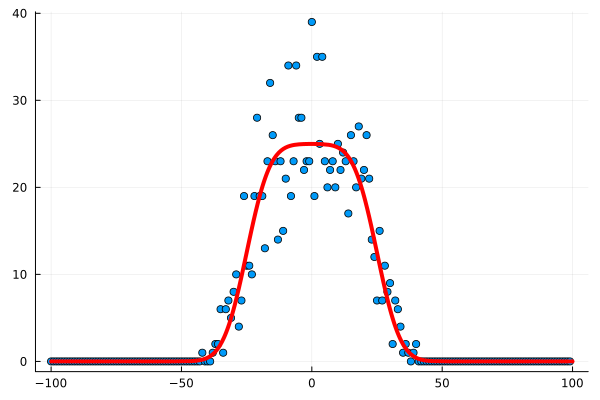

In [7]:
ue(x) = LY*U0*(erf((h-x)/sqrt(4*D*T))+erf((h+x)/sqrt(4*D*T)))/2;
p1 = scatter(xxloc,data,label=false)
p1 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false) #Create simple plot to compare stochastic simulation data and PDE solution

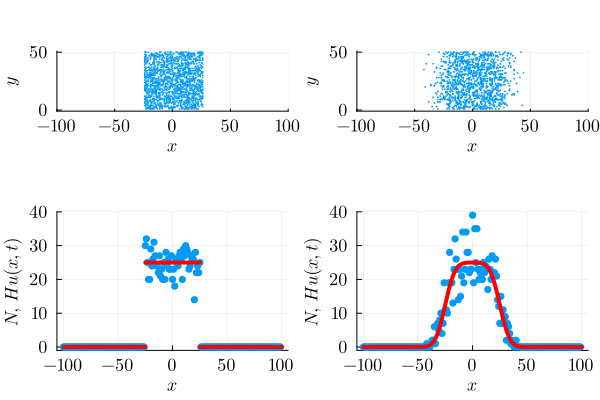

In [8]:
p1 = scatter(pos0[1:end],ms=1,msc=:auto)
p1 = plot!(ylims=(-1,51),xlims=(0,LX), aspect_ratio=:equal,legend=false)
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p1=plot!(xticks=([0, 50, 100, 150, 200],[L"-100", L"-50", L"0", L"50", L"100"]))
p1=plot!(yticks=([0, 50],[L"0",L"50"]))
p1=plot!(xlabel=L"x",ylabel=L"y")
#display(p1)

p2 = scatter(pos[1:end],ms=1,msc=:auto)
p2 = plot!(ylims=(-1,51),xlims=(0,LX), aspect_ratio=:equal,legend=false)
p2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p2=plot!(xticks=([0, 50, 100, 150, 200],[L"-100", L"-50", L"0", L"50", L"100"]))
p2=plot!(yticks=([0, 50],[L"0",L"50"]))
p2=plot!(xlabel=L"x",ylabel=L"y")
#display(p2)

p3 = scatter(xxloc,data0,label=false,msc=:auto)
f(x)=LY*U0;
g(x)=0.0;
p3=plot!(f,-h,h,lw=4,lc=:red,label=false)
p3=plot!(g,-LX/2,-h,lw=4,lc=:red,label=false)
p3=plot!(g,h,LX/2,lw=4,lc=:red,label=false)
p3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p3=plot!(xticks=([-100, -50, 0, 50, 100],[L"-100", L"-50", L"0", L"50", L"100"]))
p3=plot!(yticks=([0,10, 20, 30, 40],[L"0", L"10", L"20", L"30", L"40"]))
p3=plot!(ylims=(-1,40))
p3=plot!(xlabel=L"x",ylabel=L"N, \, H u(x,t)")


p4 = scatter(xxloc,data,label=false,msc=:auto)
p4 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false)
p4=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p4=plot!(xticks=([-100, -50, 0, 50, 100],[L"-100", L"-50", L"0", L"50", L"100"]))
p4=plot!(yticks=([0,10, 20, 30, 40],[L"0", L"10", L"20", L"30", L"40"]))
p4=plot!(ylims=(-1,40))
p4=plot!(xlabel=L"x",ylabel=L"N, \, H u(x,t)")

p5=plot(p1,p2,p3,p4,layout=(2,2))
#savefig(p5,"dots.pdf") 
display(p5) #This creates Figure 1(c)-(f)

In [9]:
a=zeros(3) #function to call loglikelihood for NLopt
function funmle(a)
return loglhood(data,a)
end;

  0.400887 seconds (2.93 M allocations: 74.097 MiB, 74.33% compilation time)


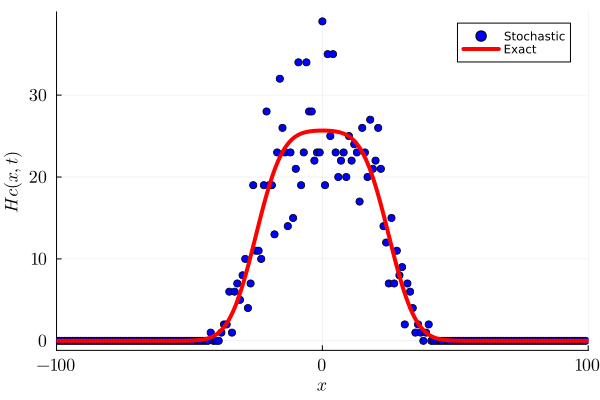

In [10]:
θG=[0.5,0.25,1.0]
lb=[0.1,0.01,0.1]
ub=[1.0,1.0,10]
@time (xopt,fopt)=Optimise(funmle,θG,lb,ub)
Umle=xopt[1]
Dmle=xopt[2]
σmle=xopt[3]
fmle=fopt
C(x)=LY*Umle*(erf((h-x)/sqrt(4*Dmle*T))+erf((h+x)/sqrt(4*Dmle*T)))/2;
p1=scatter(xxloc,data,mc=:blue,msc=:match,label="Stochastic")
p1=plot!(C,-LX/2,LX/2,lw=4,lc=:red,label="Exact",xlabel=L"x",ylabel=L"Hc(x,t)",xlims=(-100,100))
p1=plot!(xticks = ([-100,0,100],  [ L"-100", L"0", L"100" ]))
p1=plot!(yticks = ([0,10,20,30],[L"0", L"10", L"20", L"30"]))
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(p1) #Computes the MLE and plots data and MLE solution as a visual check

In [11]:
xopt #Print out the MLE 

3-element Vector{Float64}:
 0.5142800731282631
 0.3149614771598761
 2.889702232262376

In [12]:
df=1
llstar=-quantile(Chisq(df),0.95)/2; #Compute the asymptotic threshold loglikelihood value

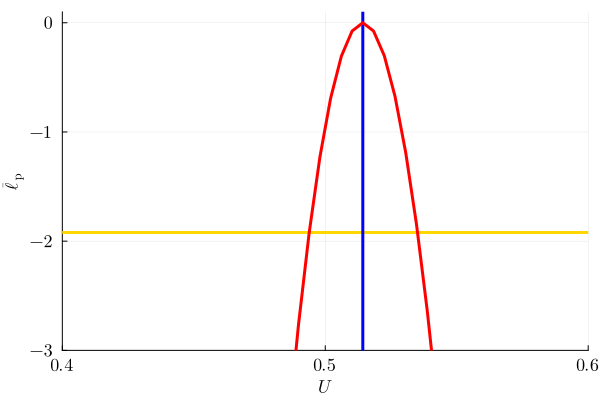

In [13]:
function univariateU(U) #Compute and plot univariate profile loglikelihood for U
    a=zeros(2)    
    function funU(a)
    return loglhood(data,[U,a[1],a[2]])
    end
    θG=[Dmle,σmle]
    lb=[0.1,0.1] 
    ub=[2.0,10.0] 
    (xopt,fopt)=Optimise(funU,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateU(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
Urange=LinRange(0.40,0.60,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateU(Urange[i])[1]
    #println(i)
end

q1=hline([llstar],legend=false,lw=3,color=:gold)
q1=vline!([Umle],legend=false,xlabel=L"U",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(Urange,ff.-maximum(ff),w=ones(length(Urange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,Urange)
q1=plot!(Urange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(Urange[1],Urange[end]))
q1=plot!(xticks=([0.4,0.5,0.6],[L"0.4", L"0.5", L"0.6"]))
q1=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q1)

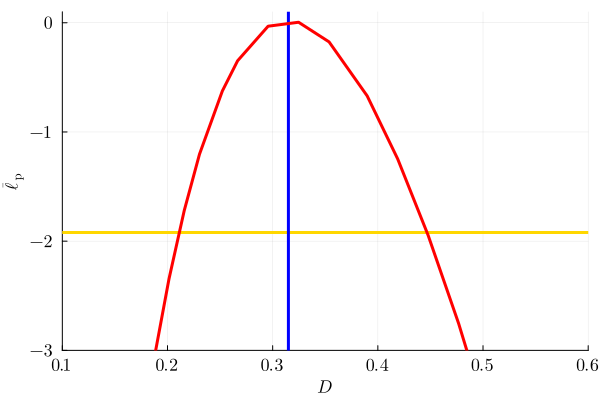

In [14]:
function univariateD(D) #Compute and plot univariate profile loglikelihood for D
    a=zeros(2)    
    function funD(a)
    return loglhood(data,[a[1],D,a[2]])
    end
    θG=[Umle,σmle]
    lb=[0.1,0] 
    ub=[1.0,10] 
    (xopt,fopt)=Optimise(funD,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateD(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=70;
Drange=LinRange(0.1,0.6,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateD(Drange[i])[1]
  #  println(i)
end

q2=hline([llstar],legend=false,lw=3,color=:gold)
q2=vline!([Dmle],legend=false,xlabel=L"D",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(Drange,ff.-maximum(ff),w=ones(length(Drange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,Drange)
q2=plot!(Drange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(Drange[1],Drange[end]))
q2=plot!(xticks=([0,0.1,0.2,0.3,0.4,0.5,0.6],[L"0",L"0.1", L"0.2", L"0.3",L"0.4", L"0.5", L"0.6"]))
q2=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q2)

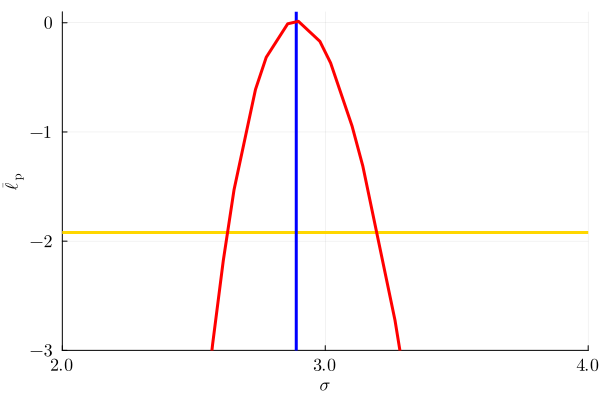

In [15]:
function univariateσ(σ) #Compute and plot univariate profile loglikelihood for \sigma
    
    a=zeros(2)    
    function funσ(a)
    return loglhood(data,[a[1],a[2],σ])
    end
    θG=[Umle,Dmle]
    lb=[0.1,0] 
    ub=[1.0,2] 
    (xopt,fopt)=Optimise(funσ,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateσ(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
σrange=LinRange(2.0,4.0,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateσ(σrange[i])[1]
    #println(i)
end

q3=hline([llstar],legend=false,lw=3,color=:gold)
q3=vline!([σmle],legend=false,xlabel=L"σ",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(σrange,ff.-maximum(ff),w=ones(length(σrange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,σrange)
q3=plot!(σrange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(σrange[1],σrange[end]))
q3=plot!(xticks=([2.0,3.0,4.0],[L"2.0",L"3.0", L"4.0"]))
q3=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q3)

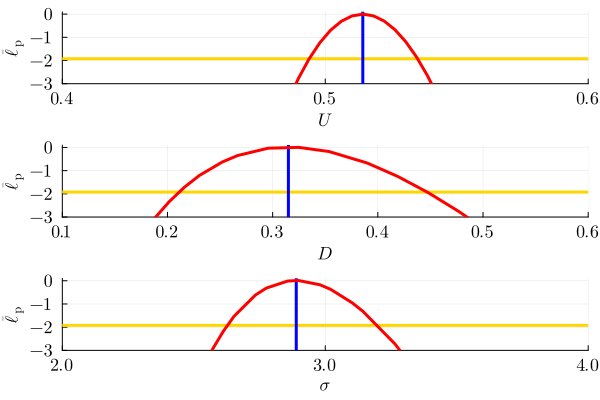

In [16]:
q4=plot(q1,q2,q3,layout=(3,1)) #Figure 5(a)
display(q4)
#savefig(q4,"Profiles.pdf")

In [28]:
Umin=0.45; Umax=0.60;
Dmin=0.10; Dmax=0.60;
σmin=2.0; σmax=3.5; #User-defined region about the MLE to sample for the prediction interval computation - computationally expensive approach

df=3
llstar=-quantile(Chisq(df),0.95)/2 #asymptotic threshold

M=1000
Usampled=zeros(M)
Dsampled=zeros(M)
σsampled=zeros(M)
lls=zeros(M)
kount = 0

while kount < M
Ug=rand(Uniform(Umin,Umax))
Dg=rand(Uniform(Dmin,Dmax))
σg=rand(Uniform(σmin,σmax))
    if (loglhood(data,[Ug,Dg,σg])-fmle) >= llstar
    kount+=1
      if mod(kount, 200) == 0
        println("samples: ", kount)
    end
    lls[kount]=loglhood(data,[Ug,Dg,σg])-fmle
    Usampled[kount]=Ug;
    Dsampled[kount]=Dg;
    σsampled[kount]=σg;    
    end

 
end

samples: 200
samples: 400
samples: 600
samples: 800
samples: 1000


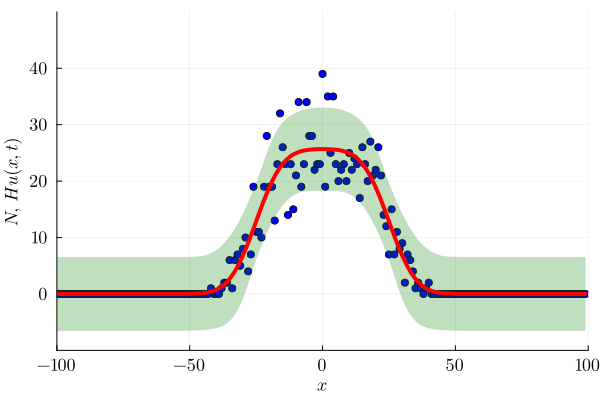

In [29]:
lower1=20*LY*ones(length(xxloc))
upper1=zeros(length(xxloc))

for i in 1:M

C(x)=LY*Usampled[i]*(erf((h-x)/sqrt(4*Dsampled[i]*T))+erf((h+x)/sqrt(4*Dsampled[i]*T)))/2;

    for j in 1:length(xxloc)
        if C(xxloc[j])+quantile(Normal(0,σsampled[i]),[0.025,0.975])[1] < lower1[j] 
            lower1[j] = C(xxloc[j])+quantile(Normal(0,σsampled[i]),[0.025,0.975])[1]
        end
       
        if C(xxloc[j])+quantile(Normal(0,σsampled[i]),[0.025,0.975])[2] > upper1[j] 
            upper1[j] = C(xxloc[j])+quantile(Normal(0,σsampled[i]),[0.025,0.975])[2] 
        end
       
    end

end
C(x)=LY*Umle*(erf((h-x)/sqrt(4*Dmle*T))+erf((h+x)/sqrt(4*Dmle*T)))/2;
r1=scatter(xxloc,data,mc=:blue,msc=:match,label=false)
r1=plot!(xxloc,lower1,lw=0,fillrange=upper1,fillalpha=0.25,color=:green,label=false,xlims=(-100,100),ylims=(-10,50))
r1=plot!(C,xxloc[1],xxloc[end],lw=4,label=false,xlabel=L"x",ylabel=L"N, \, H u(x,t)",color=:red)
r1=plot!(xticks = ([-100,-50,0,50,100],  [L"-100", L"-50", L"0", L"50", L"100"]))
r1=plot!(yticks = ([0,10,20,30,40],[L"0", L"10", L"20", L"30", L"40"]))
r1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(r1) #Prediction intervals computed using rejection sampling - computationally expensive approach

In [30]:
fff(θ1,θ2,θ3) = funmle([θ1,θ2,θ3]) #Compute the observed Fisher Information at the MLE
H = -ForwardDiff.hessian(z -> fff(z[1],z[2],z[3]),xopt);
H = Symmetric(H) #Ensure the matrix is symmetric

3×3 Symmetric{Float64, Matrix{Float64}}:
 12288.2         -1094.44        -3.77353e-6
 -1094.44          380.499        3.58304e-6
    -3.77353e-6      3.58304e-6  47.902

In [31]:
Σ = inv(H);
mvnorm = MvNormal(xopt, Σ); #MVN distribution to invoke Laplace's approximation
M=1000
samples = rand(mvnorm, M); #Draw parameter samples

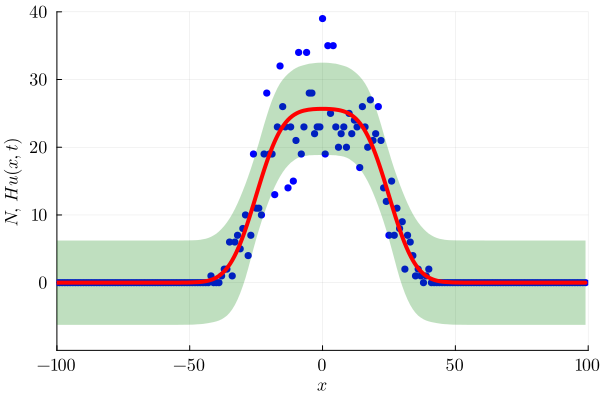

In [32]:
lower2=zeros(length(xxloc));
upper2=zeros(length(xxloc));

q25 = zeros((M,length(xxloc)));
q975 = zeros((M,length(xxloc)));

for i in 1:M
C(x)=LY*samples[1,i]*(erf((h-x)/sqrt(4*samples[2,i]*T))+erf((h+x)/sqrt(4*samples[2,i]*T)))/2;

    for j in 1:length(xxloc)
        q25[i,j]  =  C(xxloc[j])+quantile(Normal(0,samples[3,i]),[0.025,0.975])[1]
        q975[i,j] =  C(xxloc[j])+quantile(Normal(0,samples[3,i]),[0.025,0.975])[2]
    end

end

for j in 1:length(xxloc)
    lower2[j] = quantile(q25[:, j], 0.025);
    upper2[j] = quantile(q975[:, j], 0.975);
end

C(x)=LY*Umle*(erf((h-x)/sqrt(4*Dmle*T))+erf((h+x)/sqrt(4*Dmle*T)))/2;
r2=scatter(xxloc,data,mc=:blue,msc=:auto,label=false)
r2=plot!(xxloc,lower2,lw=0,fillrange=upper2,fillalpha=0.25,color=:green,label=false,xlims=(-100,100),ylims=(-10,40))
r2=plot!(C,xxloc[1],xxloc[end],lw=4,label=false,xlabel=L"x",ylabel=L"N, \, H u(x,t)",color=:red)
r2=plot!(xticks = ([-100,-50,0,50,100],  [L"-100", L"-50", L"0", L"50", L"100"]))
r2=plot!(yticks = ([0,10,20,30,40],[L"0", L"10", L"20", L"30", L"40"]))
r2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(r2) #Prediction intervals computed using Laplace's approximation - computationally inexpensive approach

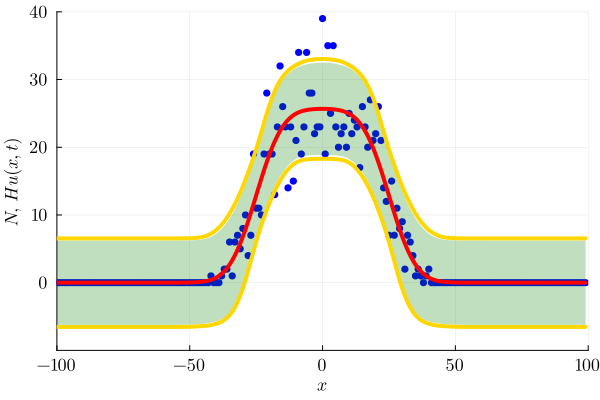

"C:\\Users\\simpsom3\\Dropbox\\RW_Inference_Identifiability_Prediction\\TidyCodes4GitHub\\Fig5b.pdf"

In [33]:
r2=plot!(xxloc,upper1,lc=:gold,lw=4,legend=false)
r2=plot!(xxloc,lower1,lc=:gold,lw=4,legend=false)
display(r2) #Figure 5(b)
savefig(r2,"Fig5b.pdf")

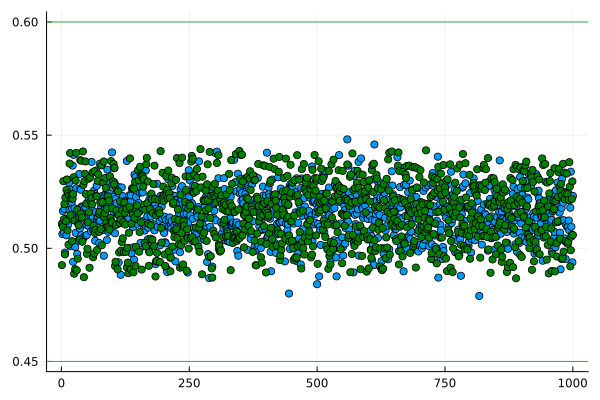

In [34]:
q1=scatter(samples[1,:],legend=false)
q1=scatter!(Usampled,mc=:green,legend=false)
q1=hline!([Umin,Umax],legend=false) #Visual check on the comparison of the two sets of samples for U.
#This is useful to check on the user-specified bounds for the rejection sampling

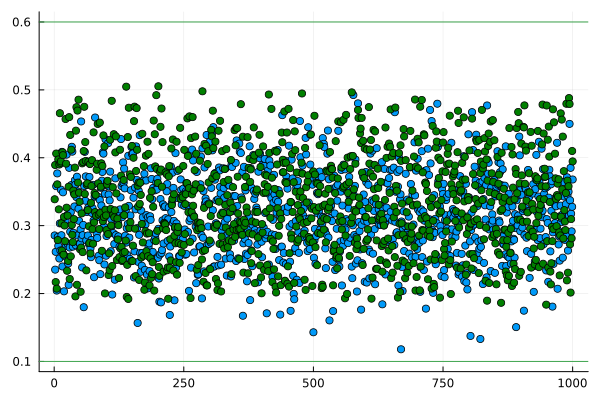

In [35]:
q1=scatter(samples[2,:],legend=false)
q1=scatter!(Dsampled,mc=:green,legend=false)
q1=hline!([Dmin,Dmax],legend=false) #Visual check on the comparison of the two sets of samples for D
#This is useful to check on the user-specified bounds for the rejection sampling

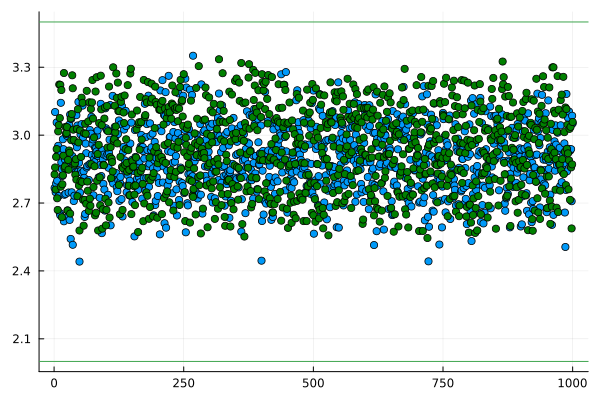

In [36]:
q1=scatter(samples[3,:],legend=false)
q1=scatter!(σsampled,mc=:green,legend=false)
q1=hline!([σmin,σmax],legend=false) #Visual check on the comparison of the two sets of samples for σ
#This is useful to check on the user-specified bounds for the rejection sampling